                                Applying the K-Means for the Supermarket data set

In [13]:

# K-Means Clustering

import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist




In [14]:

df = pd.read_excel('Supermarket_sales_data.xlsx')
df

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Rating
0,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,9.6
1,699-14-3026,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,4.1
2,315-22-5665,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,8.0
3,300-71-4605,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,4.8
4,183-56-6882,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,7.5
...,...,...,...,...,...,...,...,...,...,...
659,221-25-5073,Yangon,Normal,Female,Food and beverages,74.66,4,14.9320,313.5720,8.5
660,809-46-1866,Yangon,Normal,Male,Health and beauty,58.15,4,11.6300,244.2300,8.4
661,139-32-4183,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,7.4
662,886-18-2897,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,4.5


In [15]:
# Normalization function
def norm_func(i):
    x = (i-i.min())	/ (i.max() - i.min())
    return (x)

df_norm = norm_func(df.iloc[:,5:])

df_norm.head(10)

,Unit price,Quantity,Tax 5%,Total,Rating
0,0.057855,0.444444,0.067387,0.067387,0.933333
1,0.837895,0.666667,0.597825,0.597825,0.016667
2,0.706275,1.000000,0.738103,0.738103,0.666667
3,0.845127,0.444444,0.427368,0.427368,0.133333
4,0.993992,0.333333,0.394280,0.394280,0.583333
5,0.645750,0.000000,0.058962,0.058962,0.466667
6,0.498887,0.777778,0.436688,0.436688,0.600000
7,0.512127,0.111111,0.103833,0.103833,0.383333
8,0.985981,0.777778,0.793047,0.793047,0.600000
9,0.058856,0.111111,0.020929,0.020929,0.533333


In [16]:
# Attemp 1 to cluster
model=KMeans(n_clusters=3)
model.fit(df_norm)

c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [17]:
md=pd.Series(model.labels_)
md

0      0
1      2
2      2
3      2
4      1
      ..
659    1
660    1
661    2
662    1
663    1
Length: 664, dtype: int32

In [18]:
md=pd.Series(model.labels_)

# screw plot or elbow curve
k = list(range(2,15))

TWSS = []

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

print(TWSS)


c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

[array([312.93728851]), array([275.53889233]), array([249.16109238]), array([230.07820507]), array([216.1440511]), array([203.87593657]), array([193.47676689]), array([185.22538684]), array([178.63170574]), array([171.80387641]), array([165.72606162]), array([159.81944353]), array([155.25243782])]


([<matplotlib.axis.XTick at 0x1363a215390>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

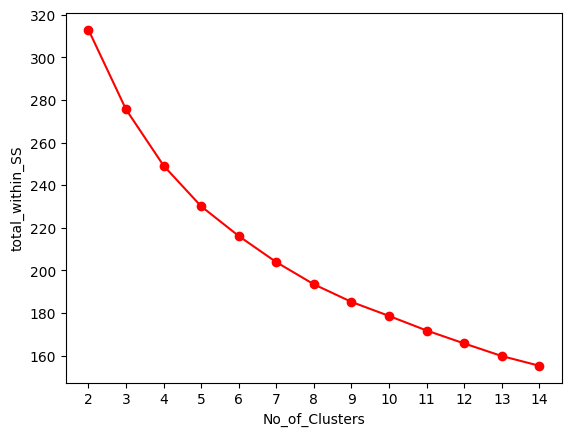

In [19]:
# Scree plot
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(k)

c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Total', ylabel='Rating'>

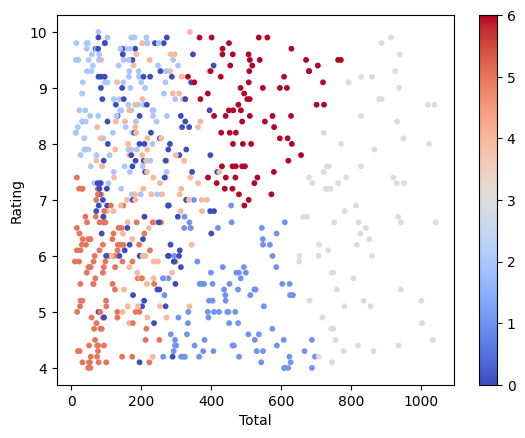

In [20]:
model=KMeans(n_clusters=7)
model.fit(df_norm)

md=pd.Series(model.labels_)
df['clust']=md
df.plot(x="Total",y="Rating",c=model.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [21]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [22]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(df_norm)

# method chaining.
h_complete.fit(df_norm)

c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [23]:
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0      0
1      1
2      1
3      0
4      0
      ..
659    0
660    0
661    1
662    0
663    0
Length: 664, dtype: int64

<Axes: xlabel='Total', ylabel='Rating'>

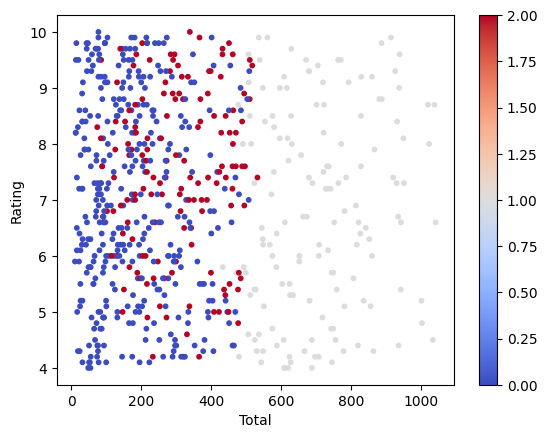

In [24]:
df.plot(x="Total",y="Rating",c=cluster_labels,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [25]:
from sklearn import metrics
print("Silhouette Coefficient - ",metrics.silhouette_score(df_norm, h_complete.labels_, metric='euclidean'))
silhouette_scr = metrics.silhouette_samples(df_norm, h_complete.labels_, metric='euclidean')

Silhouette Coefficient -  0.25619314965353845
